In [2]:
from dolo import *
from matplotlib import pyplot as plt 

In [3]:
model = yaml_import("../models/consumption_savings.yaml")

In [4]:
dr = time_iteration(model)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  8.000e-01 |      nan |    0.077 |   5 |
|   2 |  8.027e-02 |    0.100 |    0.048 |   6 |
|   3 |  4.881e-02 |    0.608 |    0.041 |   4 |
|   4 |  3.369e-02 |    0.690 |    0.048 |   5 |
|   5 |  2.470e-02 |    0.733 |    0.038 |   4 |
|   6 |  1.938e-02 |    0.785 |    0.040 |   5 |
|   7 |  1.541e-02 |    0.795 |    0.038 |   5 |
|   8 |  1.223e-02 |    0.794 |    0.031 |   4 |
|   9 |  9.744e-03 |    0.797 |    0.032 |   4 |
|  10 |  7.958e-03 |    0.817 |    0.035 |   4 |
|  11 |  6.347e-03 |    0.798 |    0.042 |   4 |
|  12 |  5.251e-03 |    0.827 |    0.033 |   4 |
|  13 |  5.288e-03 |    1.007 |    0.038 |   5 |
|  14 |  5.270e-03 |    0.997 |    0.039 |   5 |
|  15 |  5.295e-03 |    1.005 |    0.040 |   5 |
|  16 |  5.280e-03 |    0.997 |    0.048 |   5 |
|  17 |  5.154e-03 |    0.976 |    0.

One can also try the faster version

## Stochastic Simulations

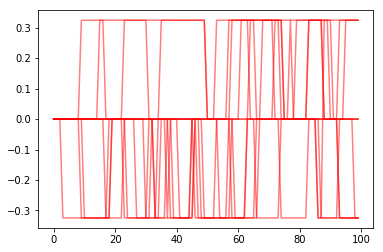

In [5]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [6]:
sim = simulate(model, dr, i0=1, N=100)

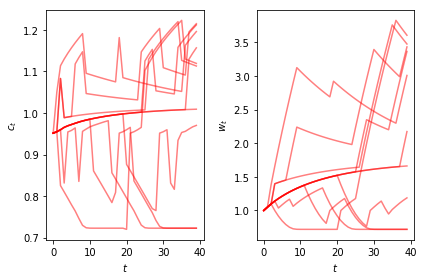

In [7]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [8]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 0, '$w$')

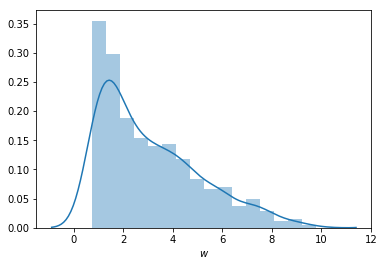

In [9]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [10]:
tab = tabulate(model, dr,'w')

In [11]:
from matplotlib import pyplot as plt

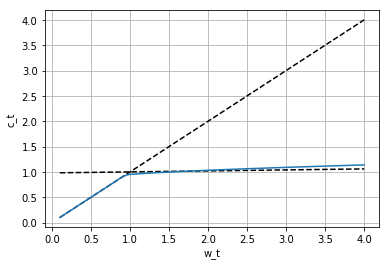

In [12]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()